import library

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Explore data

In [ ]:
train = pd.read_csv("data/train.csv")
store = pd.read_csv("data/store.csv")
#info of train df
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None


C:\Users\V\AppData\Local\Temp\ipykernel_1512\4195452424.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("data/train.csv")


In [5]:
print(train.head())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [6]:
print(train.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


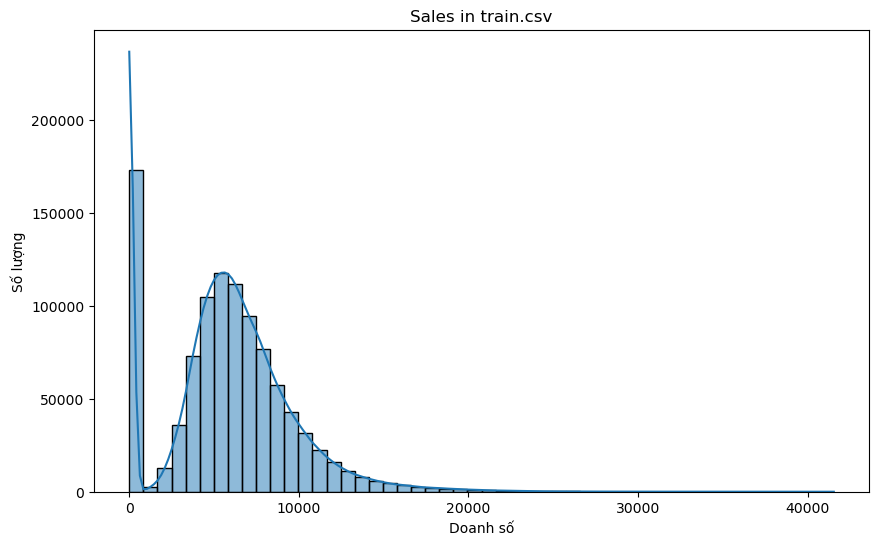

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(train["Sales"], bins=50, kde=True)
plt.title("Sales in train.csv")
plt.xlabel("Doanh số")
plt.ylabel("Số lượng")
plt.show()

In [8]:
#Checking for inconsistance in Sales and Open
print(len(train[train["Sales"] == 0]))
print(len(train[train["Open"] == 0]))
print(len(train[(train["Open"] == 0) & (train["Sales"] > 0)]))

172871
172817
0


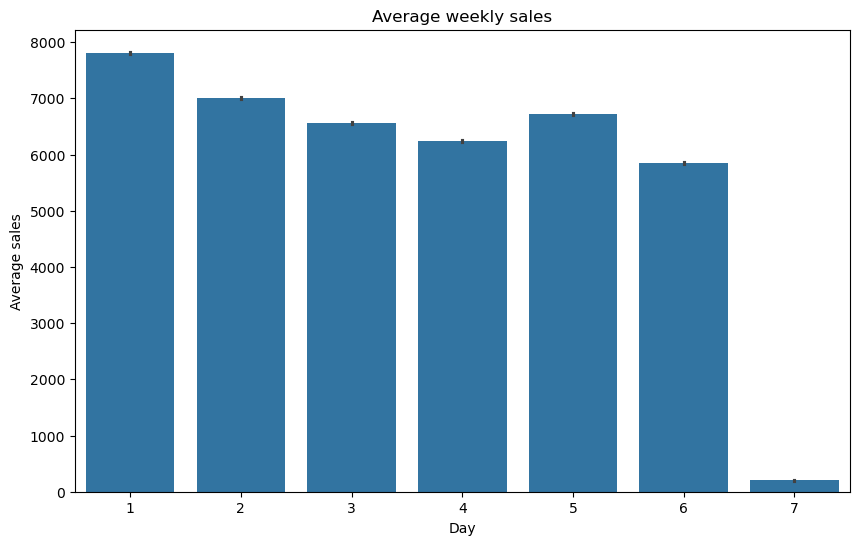

In [9]:
#Doanh số trung bình trong tuần (2->cn)
plt.figure(figsize=(10, 6))
sns.barplot(x="DayOfWeek", y="Sales", data=train)
plt.title("Average weekly sales")
plt.xlabel("Day")
plt.ylabel("Average sales")
plt.show()

In [10]:
print(store.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None


In [11]:
print("head\n",store.head())

head
    Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Ja

In [12]:
print("sum of null\n",store.isnull().sum())

sum of null
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


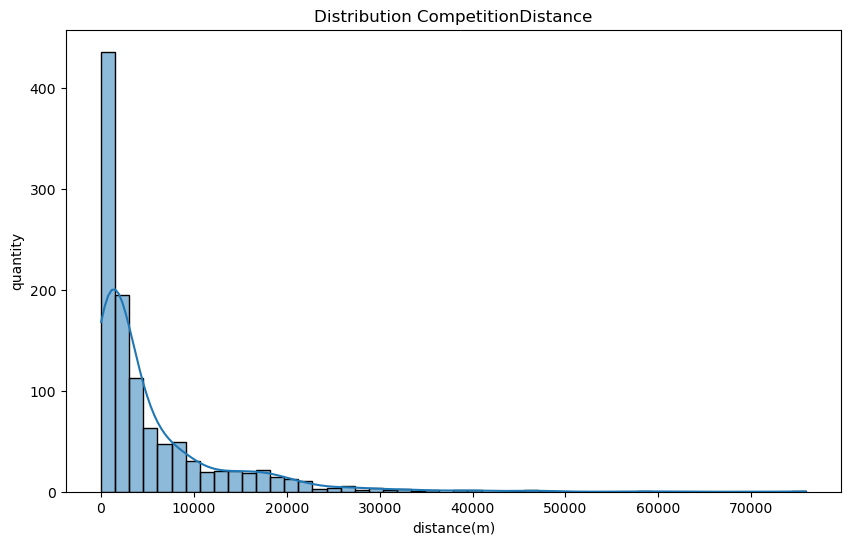

In [13]:
#Phân phối của CompetitionDistance
plt.figure(figsize=(10, 6))
sns.histplot(store["CompetitionDistance"].dropna(), bins=50, kde=True)
plt.title("Distribution CompetitionDistance")
plt.xlabel("distance(m)")
plt.ylabel("quantity")
plt.show()

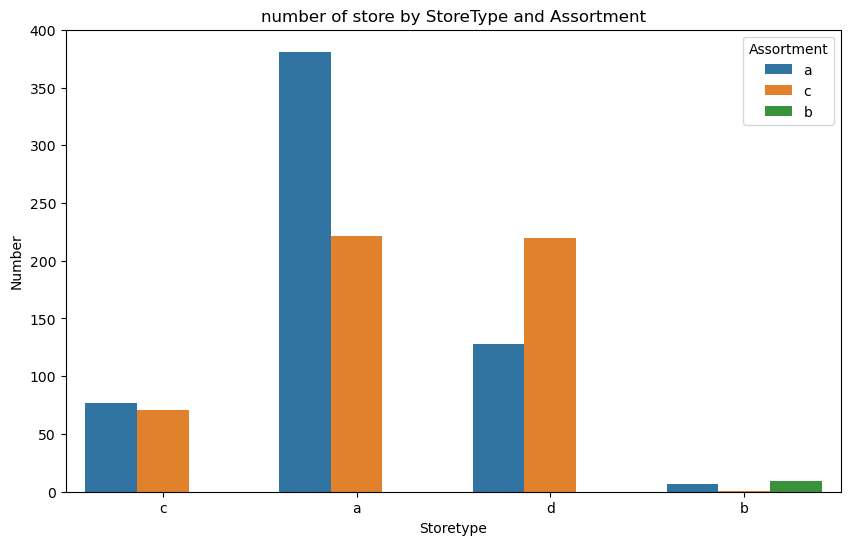

In [14]:
#Đếm StoreType và Assortment(loại sp)
plt.figure(figsize=(10, 6))
sns.countplot(x="StoreType", hue="Assortment", data=store)
plt.title("number of store by StoreType and Assortment")
plt.xlabel("Storetype")
plt.ylabel("Number")
plt.show()

In [15]:
#Kiểm tra giá trị bất thường trong CompetitionDistance
print("\nCompetition Distance max:")
print(store["CompetitionDistance"].max())
print("Competition Distance min:")
print(store["CompetitionDistance"].min())
print("n/a:")
print(sum(store['CompetitionDistance'].isna()))


Competition Distance max:
75860.0
Competition Distance min:
20.0
n/a:
3


Data Cleaning & Processing

In [16]:
#Clean data
train_cleaned = train[train["Sales"] > 0]  #Remove Sales = 0
store["CompetitionDistance"].fillna(999999, inplace=True)

store_cleaned = store.copy()
store_cleaned["CompetitionDistance"].fillna(999999, inplace=True)  #filled NA in CompetitionDistance

#merge data
preprocessed_data = pd.merge(train_cleaned, store_cleaned, on="Store")
preprocessed_data.to_csv("data/preprocessed_data.csv", index=False)

C:\Users\V\AppData\Local\Temp\ipykernel_1512\590601877.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store["CompetitionDistance"].fillna(999999, inplace=True)
C:\Users\V\AppData\Local\Temp\ipykernel_1512\590601877.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [17]:
#Encode categorical variables
preprocessed_data = pd.read_csv("data/preprocessed_data.csv", low_memory=False)
preprocessed_data["StoreType"] = LabelEncoder().fit_transform(preprocessed_data["StoreType"])
preprocessed_data["Assortment"] = LabelEncoder().fit_transform(preprocessed_data["Assortment"])
preprocessed_data["StateHoliday"] = preprocessed_data["StateHoliday"].map({"0": 0, "a": 1, "b": 2, "c": 3})

#preprocessed_data.to_csv("data/preprocessed_data.csv", index=False)

In [18]:
# Split data
_x = preprocessed_data.drop(["Sales", "Customers", "Date", "PromoInterval"], axis=1)
_y = preprocessed_data["Sales"]
x_train, x_val, y_train, y_val = train_test_split(_x, _y, test_size=0.2, random_state=50)

In [19]:
#Saveprocessed data
preprocessed_data.to_csv("data/preprocessed_data.csv", index=False)